# Lab3 - Introduction to Deep Neural Network


## Lab Instruction 

In this lab, you will learn to create a simple fully-connect neural network using Keras library with Tensorflow backend. We will play with MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

First, import all the library that we will use in this lab

In [1]:
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data. For example, its shape, format, datatype, structure, distribution, data classes, etc.

### Type of dataset

In [3]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [4]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [5]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [6]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


In [7]:
train_images[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

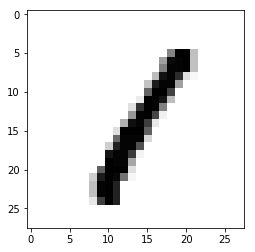

In [9]:
digit = train_images[3]
# print(digit.shape())

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [10]:
train_labels[3]

1

### 2. Build Neural Network Model

Build a two-layer neural network using `Sequential()`
( See https://keras.io/models/sequential ) 
> INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID

with the hidden layer of size 512

See Keras Model: https://keras.io/models/about-keras-models/



In [11]:
from keras import models
from keras import layers

In [12]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='sigmoid'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [13]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])

Let's see how our model looklike using `.summary()`

In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3. Preprocessing

- Reshape the features data (flattern) and normalize the value to be between 0 and 1
- One-hot the target data

In [15]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [16]:
from keras.utils import to_categorical

In [17]:
print(train_labels[0])

5


In [18]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 4. Model Training 

Use `.fit()` to train your neural network model and return the record of accuracy and loss value in each epoch

We will train model with 10 epoch (If you confident with your computer performance, you can trian model with more epoch.)

We will train with mini-batch method with each the batch size equal to 128 data.

To prevent the overfit with test set, we will split a current training data into 90% for training and 10% for validating model.

This process will take about a minute.

In [20]:
history = network.fit(train_images,train_labels,epochs=30,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 64us/step - loss: 1.5950 - acc: 0.6526 - val_loss: 0.8420 - val_acc: 0.8613
Epoch 2/30
54000/54000 [==============================] - 2s 28us/step - loss: 0.6775 - acc: 0.8513 - val_loss: 0.4720 - val_acc: 0.8972
Epoch 3/30
54000/54000 [==============================] - 1s 27us/step - loss: 0.4893 - acc: 0.8788 - val_loss: 0.3758 - val_acc: 0.9130
Epoch 4/30
54000/54000 [==============================] - 1s 28us/step - loss: 0.4201 - acc: 0.8906 - val_loss: 0.3307 - val_acc: 0.9188
Epoch 5/30
54000/54000 [==============================] - 1s 27us/step - loss: 0.3820 - acc: 0.8979 - val_loss: 0.3044 - val_acc: 0.9210
Epoch 6/30
54000/54000 [==============================] - 1s 27us/step - loss: 0.3569 - acc: 0.9034 - val_loss: 0.2863 - val_acc: 0.9263
Epoch 7/30
54000/54000 [==============================] - 1s 27us/step - loss: 0.3385 - acc: 0.9075 - val_loss: 0.2726 - val_acc:

We will plot the loss and accuracy of both train set and validate set over iteration.

In [20]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [21]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

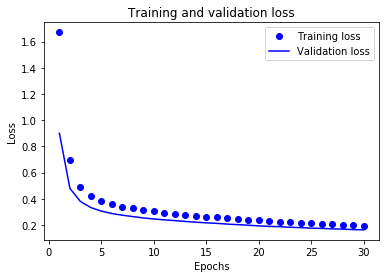

In [22]:
plot_loss_fn(history)

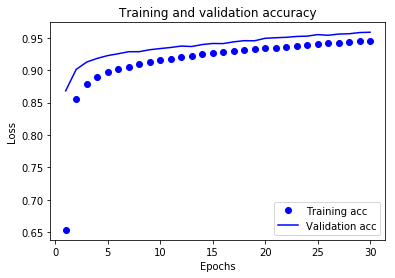

In [23]:
plot_acc_fn(history)

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the result with the training set and validate set. Does your model overfit or underfit? How about the bias and variance?

In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 45us/step
Test Loss: 0.18893926587
Test Accuracy: 0.9447


Use confusion matrix to analyse the performance of your model. which class does your model classify poorly. What is your model precision and recall. 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      5923
          1       0.96      0.98      0.97      6742
          2       0.95      0.94      0.94      5958
          3       0.94      0.93      0.93      6131
          4       0.94      0.95      0.94      5842
          5       0.94      0.93      0.94      5421
          6       0.95      0.97      0.96      5918
          7       0.95      0.95      0.95      6265
          8       0.94      0.93      0.93      5851
          9       0.94      0.92      0.93      5949

avg / total       0.95      0.95      0.95     60000

[[5781    1   11    7   10   17   40    5   44    7]
 [   1 6603   33   21    9   16    3   12   36    8]
 [  25   36 5572   58   63   10   48   58   78   10]
 [  15   24   92 5695    4  112   21   50   76   42]
 [  10   24   24    5 5555    2   53   11   26  132]
 [  44   24   18   97   37 5021   86   13   45   36]
 [  35   16   15    1   37   52 5741    2  

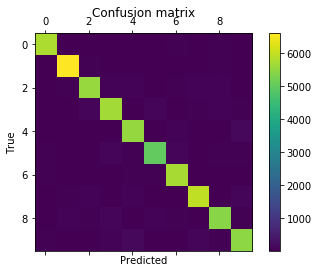

In [26]:
y_pred = network.predict_classes(train_images)
y_true = np.argmax(train_labels, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9,]

cr = classification_report(y_true, y_pred)
print(cr)
cm = confusion_matrix(y_true, y_pred,labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 6. Model tuning

Try to tune your model by: 
1. Adjust the learning rate of your optimizer by increasing and decreasing learning rate and see how it affect your model.
2. Try using different optimizer ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) and see which one converge faster.
3. Change your the model structure by adding more hidden layer with any number of node and see how it affect your model.

In [61]:
import numpy as np
import keras
from keras import optimizers
from keras import models
from keras import layers
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

import  matplotlib.pyplot  as plt
%matplotlib inline
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()



#### lr 0.002
sgd = optimizers.SGD(lr=0.002, momentum=0.0, decay=0.0, nesterov=False)

In [41]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.002, momentum=0.0, decay=0.0, nesterov=False)

networkOptimizer.compile(optimizer=sgd,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
networkOptimizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 37us/step - loss: 2.2126 - acc: 0.2675 - val_loss: 2.0994 - val_acc: 0.4937
Epoch 2/10
54000/54000 [==============================] - 2s 31us/step - loss: 1.9948 - acc: 0.5855 - val_loss: 1.8509 - val_acc: 0.7052
Epoch 3/10
54000/54000 [==============================] - 2s 31us/step - loss: 1.7031 - acc: 0.7170 - val_loss: 1.4929 - val_acc: 0.7972
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 1.3454 - acc: 0.7824 - val_loss: 1.1351 - val_acc: 0.8372
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 1.0576 - acc: 0.8143 - val_loss: 0.8904 - val_acc: 0.8607
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.8714 - acc: 0.8324 - val_loss: 0.7365 - val_acc: 0.8760
Epoch 7/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.7519 - acc: 0.8447 - val_loss: 0.6360 - val_acc:

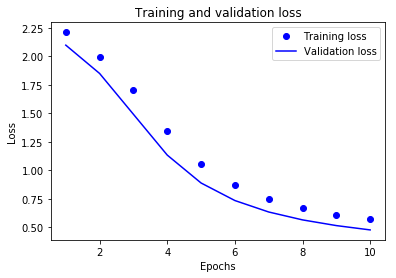

In [43]:
plot_loss_fn(historyOptimizer)

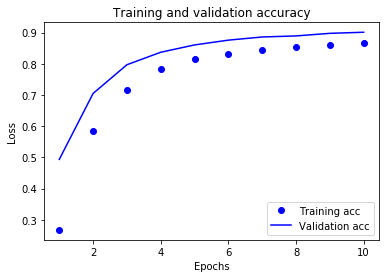

In [44]:
plot_acc_fn(historyOptimizer)

#### Decreasing lr
sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [16]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

networkOptimizer.compile(optimizer=sgd,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
networkOptimizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 35us/step - loss: 2.3406 - acc: 0.0569 - val_loss: 2.3337 - val_acc: 0.0525
Epoch 2/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.3261 - acc: 0.0630 - val_loss: 2.3192 - val_acc: 0.0603
Epoch 3/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.3125 - acc: 0.0716 - val_loss: 2.3056 - val_acc: 0.0723
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.2998 - acc: 0.0818 - val_loss: 2.2929 - val_acc: 0.0830
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.2878 - acc: 0.0942 - val_loss: 2.2808 - val_acc: 0.0965
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.2764 - acc: 0.1090 - val_loss: 2.2692 - val_acc: 0.1148
Epoch 7/10
54000/54000 [==============================] - 2s 31us/step - loss: 2.2655 - acc: 0.1274 - val_loss: 2.2582 - val_acc:

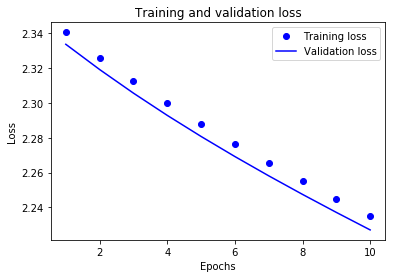

In [18]:
plot_loss_fn(historyOptimizer)

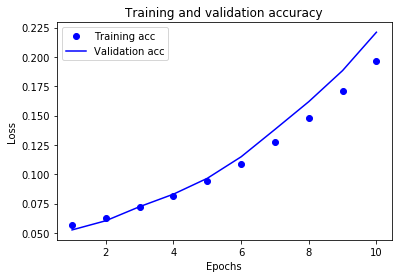

In [20]:
plot_acc_fn(historyOptimizer)

#### Increasing lr
sgd = optimizers.SGD(lr=1.0, momentum=0.0, decay=0.0, nesterov=False)

In [21]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

sgd = optimizers.SGD(lr=1.0, momentum=0.0, decay=0.0, nesterov=False)

networkOptimizer.compile(optimizer=sgd,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
networkOptimizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.3442 - acc: 0.8969 - val_loss: 0.1091 - val_acc: 0.9650
Epoch 2/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.1029 - acc: 0.9686 - val_loss: 0.1091 - val_acc: 0.9648
Epoch 3/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0687 - acc: 0.9790 - val_loss: 0.0907 - val_acc: 0.9732
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0489 - acc: 0.9844 - val_loss: 0.0639 - val_acc: 0.9815
Epoch 5/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0356 - acc: 0.9893 - val_loss: 0.0692 - val_acc: 0.9803
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0267 - acc: 0.9921 - val_loss: 0.0702 - val_acc: 0.9787
Epoch 7/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0194 - acc: 0.9947 - val_loss: 0.0613 - val_acc:

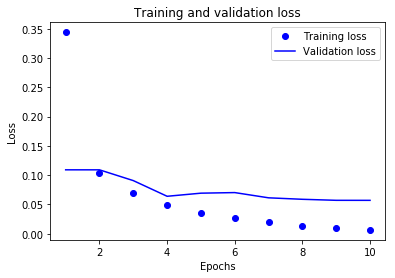

In [23]:
plot_loss_fn(historyOptimizer)

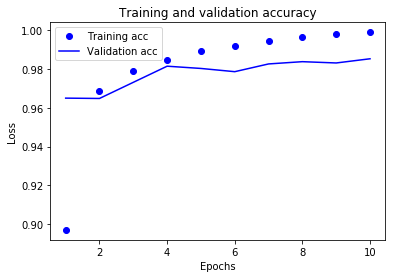

In [24]:
plot_acc_fn(historyOptimizer)

### Try other Optimizer
'sgd', 'rmspop', 'adagrad', 'adam'

#### sgd lr = 0.001

In [70]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

rmsprop = optimizers.rmsprop(lr=0.001)

networkOptimizer.compile(optimizer=rmsprop,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.3026 - acc: 0.9149 - val_loss: 0.1240 - val_acc: 0.9658
Epoch 2/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.1267 - acc: 0.9620 - val_loss: 0.0983 - val_acc: 0.9722
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0837 - acc: 0.9753 - val_loss: 0.0813 - val_acc: 0.9762
Epoch 4/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0604 - acc: 0.9817 - val_loss: 0.0790 - val_acc: 0.9783
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0462 - acc: 0.9861 - val_loss: 0.0681 - val_acc: 0.9818
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0356 - acc: 0.9892 - val_loss: 0.0714 - val_acc: 0.9788
Epoch 7/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0272 - acc: 0.9919 - val_loss: 0.0710 - val_acc:

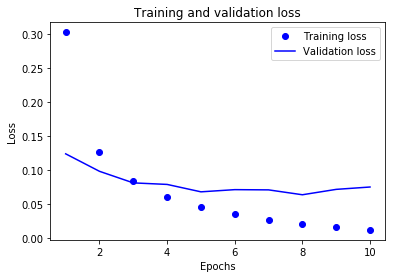

In [71]:
plot_loss_fn(historyOptimizer)

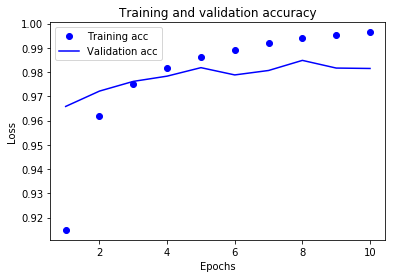

In [72]:
plot_acc_fn(historyOptimizer)

#### rmspop lr = 0.001

In [66]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

rmsprop = optimizers.rmsprop(lr=0.001)

networkOptimizer.compile(optimizer=rmsprop,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

# plot_loss_fn(historyOptimizer)
# plot_acc_fn(historyOptimizer)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.3046 - acc: 0.9128 - val_loss: 0.1479 - val_acc: 0.9577
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.1257 - acc: 0.9630 - val_loss: 0.0921 - val_acc: 0.9733
Epoch 3/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0837 - acc: 0.9752 - val_loss: 0.0769 - val_acc: 0.9788
Epoch 4/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0778 - val_acc: 0.9772
Epoch 5/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0463 - acc: 0.9860 - val_loss: 0.0780 - val_acc: 0.9777
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0351 - acc: 0.9894 - val_loss: 0.0665 - val_acc: 0.9807
Epoch 7/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0277 - acc: 0.9920 - val_loss: 0.0711 - val_acc:

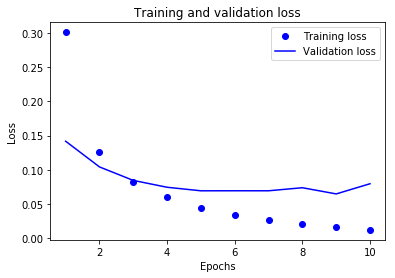

In [49]:
plot_loss_fn(historyOptimizer)

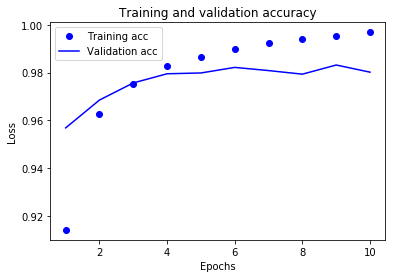

In [50]:
plot_acc_fn(historyOptimizer)

#### adagrad lr = 0.001

In [67]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

adagrad = optimizers.adagrad(lr=0.001)

networkOptimizer.compile(optimizer=adagrad,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

# plot_loss_fn(historyOptimizer)
# plot_acc_fn(historyOptimizer)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.5870 - acc: 0.8712 - val_loss: 0.3213 - val_acc: 0.9242
Epoch 2/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3505 - acc: 0.9096 - val_loss: 0.2700 - val_acc: 0.9333
Epoch 3/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.3111 - acc: 0.9180 - val_loss: 0.2456 - val_acc: 0.9378
Epoch 4/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2893 - acc: 0.9234 - val_loss: 0.2317 - val_acc: 0.9398
Epoch 5/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2742 - acc: 0.9264 - val_loss: 0.2212 - val_acc: 0.9422
Epoch 6/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2628 - acc: 0.9293 - val_loss: 0.2127 - val_acc: 0.9442
Epoch 7/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.2538 - acc: 0.9317 - val_loss: 0.2069 - val_acc:

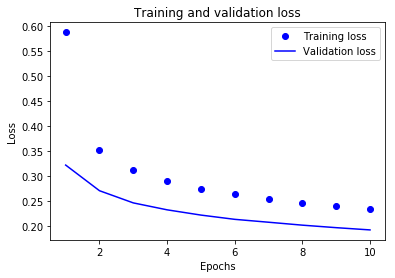

In [68]:
plot_loss_fn(historyOptimizer)

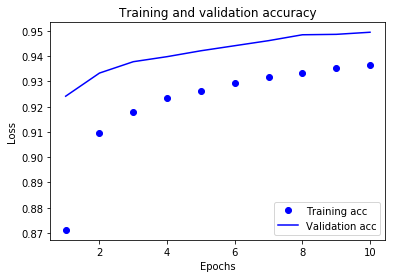

In [69]:
plot_acc_fn(historyOptimizer)

#### adam lr = 0.001

In [100]:
networkOptimizer = models.Sequential()
networkOptimizer.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(10, activation='sigmoid'))

adam = optimizers.adam(lr=0.001)

networkOptimizer.compile(optimizer=adam,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.3093 - acc: 0.9154 - val_loss: 0.1224 - val_acc: 0.9672
Epoch 2/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.1236 - acc: 0.9639 - val_loss: 0.0889 - val_acc: 0.9725
Epoch 3/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0816 - acc: 0.9758 - val_loss: 0.0749 - val_acc: 0.9770
Epoch 4/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0569 - acc: 0.9837 - val_loss: 0.0738 - val_acc: 0.9797
Epoch 5/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0431 - acc: 0.9871 - val_loss: 0.0704 - val_acc: 0.9793
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0328 - acc: 0.9904 - val_loss: 0.0662 - val_acc: 0.9807
Epoch 7/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0262 - acc: 0.9924 - val_loss: 0.0663 - val_acc:

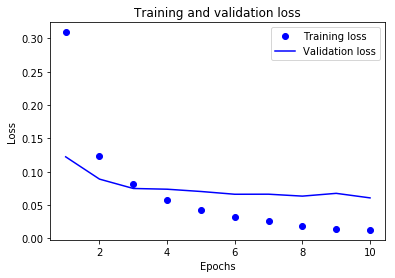

In [101]:
plot_loss_fn(historyOptimizer)

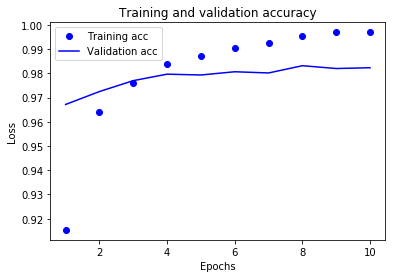

In [102]:
plot_acc_fn(historyOptimizer)

#### Change your the model structure
Add Layers 
input -> linear -> relu -> linear -> softmax out

optimizer = sgd 

lr = 0.1

Change batch_size to 32

Increase Epoch to 100 

In [103]:
networkOptimizer.add(layers.Dense(512, activation='linear',input_shape=(28*28,)))
networkOptimizer.add(layers.Dense(512, activation='relu'))
networkOptimizer.add(layers.Dense(512, activation='linear'))
networkOptimizer.add(layers.Dense(10, activation='softmax'))

sgd = optimizers.sgd(lr=0.1)

networkOptimizer.compile(optimizer=sgd,
                loss='categorical_crossentropy',
#                 loss='mean_squared_error',
                metrics=['accuracy'])
historyOptimizer = networkOptimizer.fit(train_images,train_labels,epochs=100,batch_size=32,validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 205us/step - loss: 0.1006 - acc: 0.9776 - val_loss: 0.0758 - val_acc: 0.9808
Epoch 2/100
54000/54000 [==============================] - 9s 174us/step - loss: 0.0136 - acc: 0.9961 - val_loss: 0.0749 - val_acc: 0.9833
Epoch 3/100
54000/54000 [==============================] - 9s 174us/step - loss: 0.0067 - acc: 0.9982 - val_loss: 0.0849 - val_acc: 0.9830
Epoch 4/100
54000/54000 [==============================] - 9s 174us/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0922 - val_acc: 0.9805
Epoch 5/100
54000/54000 [==============================] - 9s 173us/step - loss: 0.0045 - acc: 0.9988 - val_loss: 0.0882 - val_acc: 0.9822
Epoch 6/100
54000/54000 [==============================] - 9s 174us/step - loss: 0.0040 - acc: 0.9988 - val_loss: 0.0947 - val_acc: 0.9810
Epoch 7/100
54000/54000 [==============================] - 9s 175us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.

Epoch 58/100
54000/54000 [==============================] - 9s 174us/step - loss: 9.2325e-06 - acc: 1.0000 - val_loss: 0.0956 - val_acc: 0.9847
Epoch 59/100
54000/54000 [==============================] - 9s 173us/step - loss: 9.0599e-06 - acc: 1.0000 - val_loss: 0.0957 - val_acc: 0.9847
Epoch 60/100
54000/54000 [==============================] - 9s 174us/step - loss: 8.8938e-06 - acc: 1.0000 - val_loss: 0.0958 - val_acc: 0.9847
Epoch 61/100
54000/54000 [==============================] - 9s 173us/step - loss: 8.7320e-06 - acc: 1.0000 - val_loss: 0.0959 - val_acc: 0.9848
Epoch 62/100
54000/54000 [==============================] - 9s 174us/step - loss: 8.5759e-06 - acc: 1.0000 - val_loss: 0.0960 - val_acc: 0.9848
Epoch 63/100
54000/54000 [==============================] - 9s 173us/step - loss: 8.4257e-06 - acc: 1.0000 - val_loss: 0.0961 - val_acc: 0.9848
Epoch 64/100
54000/54000 [==============================] - 9s 174us/step - loss: 8.2814e-06 - acc: 1.0000 - val_loss: 0.0962 - val_acc:

In [104]:
test_loss, test_acc = networkOptimizer.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 1s 60us/step
Test Loss: 0.108482165763
Test Accuracy: 0.9837


### 7. Discussion and Result


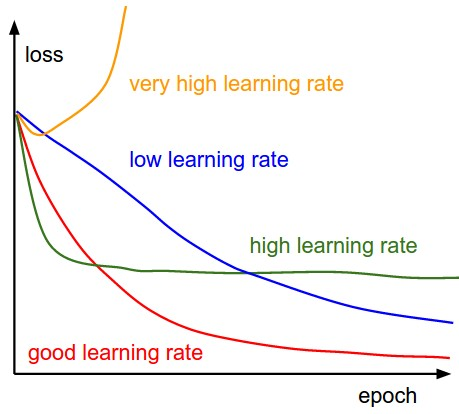


From the Experiment 

10 epochs, sgd, lr = 0.002 = Best Graph

10 epochs, sgd, lr = 1.0 = Mininum loss, Best accuracy  

Optimizer: From graph and Result ADAM optimizer is better than SGD